In [21]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
import matplotlib as mpl
import numpy as np

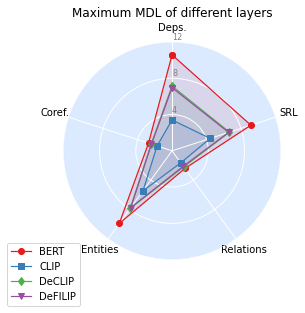

In [61]:
colormap = mpl.cm.Set1.colors
# Set data  
# Maximum MDL 
df = pd.DataFrame({
'group': ['BERT','CLIP','DeCLIP','DeFILIP'],
'Deps.': [10.59, 3.41, 7.15, 6.97],
'SRL': [9.15, 4.43, 6.66, 6.57],
'Relations': [2.41 , 1.64 , 2.19, 2.10],
'Entities': [9.91 , 5.46 , 7.84, 7.76],
'Coref.': [2.73,1.74,2.42,2.39]
})
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([4,  8, 12], ["4", "8","12"], color="grey", size=8)
plt.ylim(0,12)
 

# ------- PART 2: Add plots
#  plot_color_gradients('Sequential',
#                      ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#                       'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#                       'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
labels = ["BERT", "CLIP", "DeCLIP", "DeFILIP"]
markers = ["o", "s", "d", "v"]
for idx in range(4):
    # BERT
    values=df.loc[idx].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values,  color=colormap[idx], linewidth=1.2, linestyle='solid', label=labels[idx], marker=markers[idx])
    ax.fill(angles, values,  color=colormap[idx], alpha=0.1)

# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")
# Remove lines for radial axis (y)
# ax.set_yticks([])
# ax.yaxis.grid(color='white')
# ax.xaxis.grid( color='white')
# ax.grid(width=5)
ax.grid(which='both', color='white', linewidth=1)
# Angle values going from 0 to 2*pi
HANGLES = np.linspace(0, 2 * np.pi)
ax.fill(HANGLES, np.ones(len(HANGLES)) * 12,  color="#4D96FF", alpha=0.2)

# CLIP
# values=df.loc[1].drop('group').values.flatten().tolist()
# values += values[:1]
# ax.plot(angles, values,  color=colormap[1], linewidth=2, linestyle='solid', label="CLIP", marker='o')
# ax.fill(angles, values,  color=colormap[1],  alpha=0.1)
 
# # DeCLIP
# values=df.loc[2].drop('group').values.flatten().tolist()
# values += values[:1]
# ax.plot(angles, values, color=colormap[2],linewidth=2, linestyle='solid', label="DeCLIP", marker='s')
# ax.fill(angles, values,color=colormap[2], alpha=0.1)
# #  DeFILIP
# values=df.loc[3].drop('group').values.flatten().tolist()
# values += values[:1]
# ax.plot(angles, values ,color=colormap[3], linewidth=2, linestyle='-', label="DeFILIP", marker='*')
# ax.fill(angles, values, color=colormap[3], alpha=0.05)
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))
plt.title("Maximum MDL of different layers")
plt.savefig("radar_max_mdl.pdf", dpi=2000, bbox_inches='tight')
# Show the graph
plt.show()